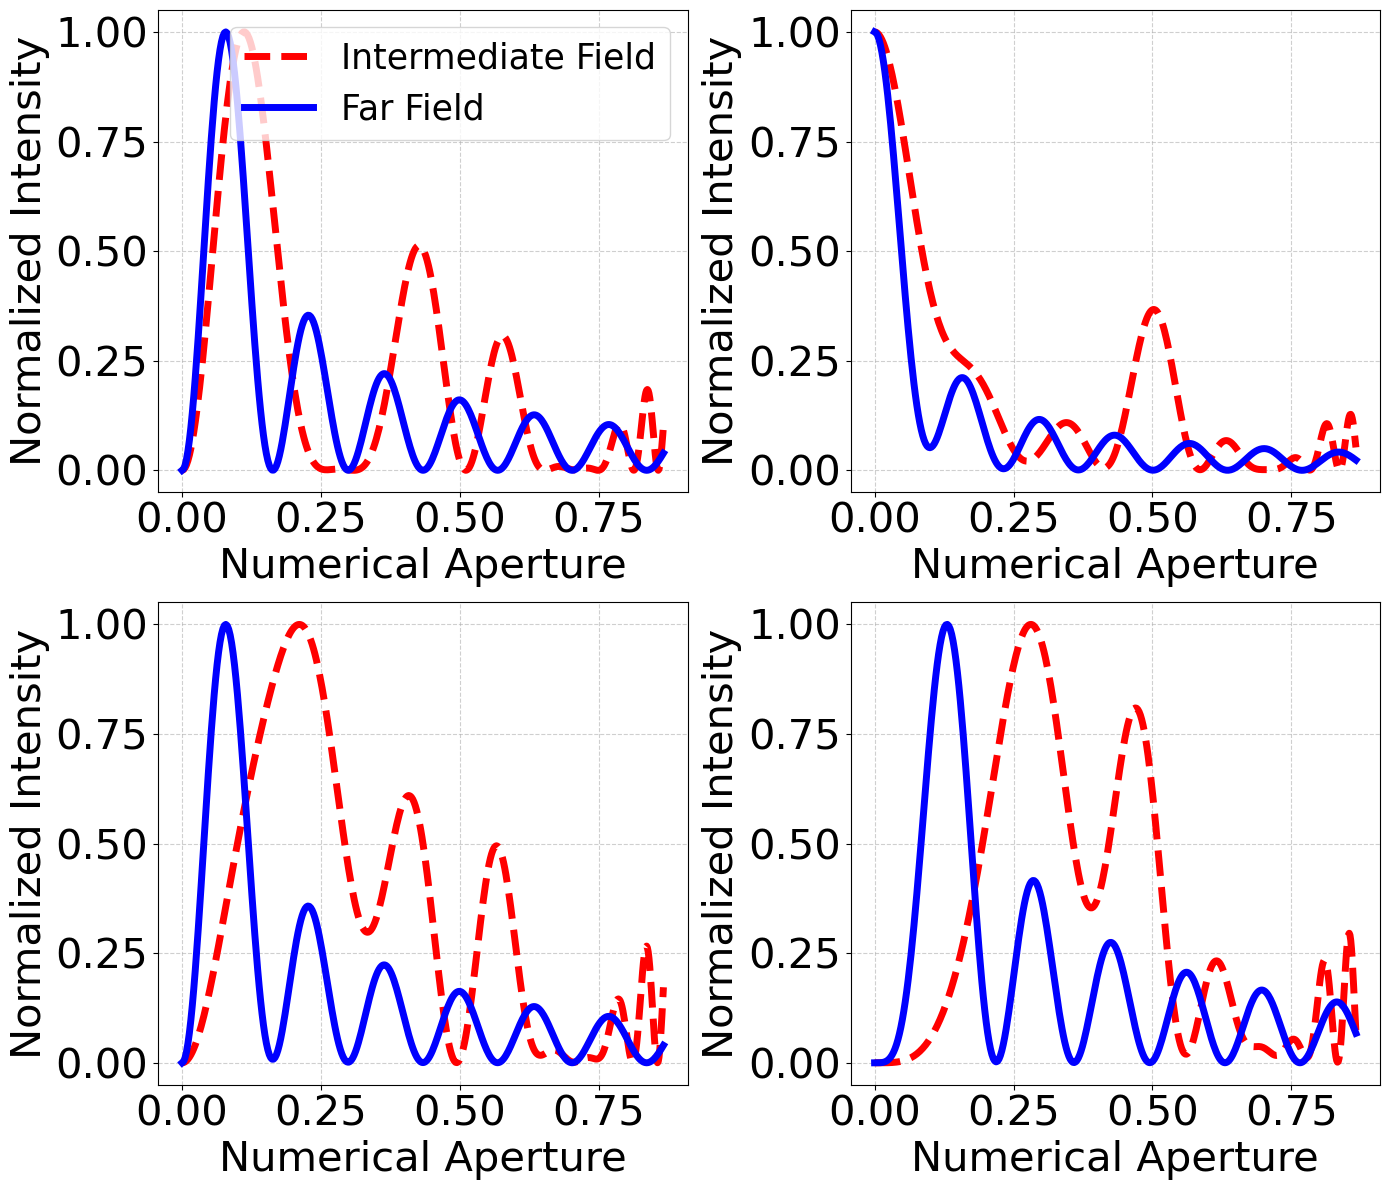

In [4]:
# Bessel function of first kind
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv  # Bessel function of first kind
import math
 
# Define parameters
wavelength = 532e-9  # in meters
k = 2 * np.pi / wavelength  # Wavevector
rho_n = 1e-6  # in meters                                                     I need normalized field. equation 10 is for intermediate field and equation 13 is for farfield
rho_q = 2e-6  # in meters
z = 15e-6  # in meters
z0 = z + 50e-6  # z0 = z + 5 um
theta_q= math.atan(rho_q/z)
#theta_q = 0.7  # in radians
r_q = np.sqrt(z**2 + (rho_n * np.sin(theta_q))**2)  
r_q = np.sqrt(z**2 + (rho_n)**2)  
#rho_q = r_q * np.sin(theta_q)  
Q = 10  
N=20
# Define theta range
theta_vals = np.linspace(0, np.pi/3, 400)  
phi_vals = np.linspace(0, 2*np.pi, 400)
NA_vals = np.sin(theta_vals)  # Convert theta to Numerical Aperture (NA)
 
# Function to compute intensity after the first grating
def intensity_IF(theta, phi, L):
    """Intermediate Field Intensity, with A = 1/r_q"""
    A = 1
    J_Lm1 = jv(L-1, k * rho_n * np.tan(theta))
    J_Lp1 = jv(L+1, k * rho_n * np.tan(theta))
    E_x = A * (J_Lm1 * np.exp(1j*(L-1)*phi) + J_Lp1 * np.exp(1j*(L+1)*phi))
    E_y = N*A * (1j * J_Lm1*np.exp(1j*(L-1)*phi) - 1j * J_Lp1*np.exp(1j*(L+1)*phi))
    return np.abs(E_x)**2 + np.abs(E_y)**2
 
# Function to compute intensity after the second grating
def intensity_FF(theta,phi, L):
    """Far-Field Intensity, with B = 1/r"""
    r = z0  # Note: r is constant for given setup
    B = 1
    J_Lm1 = jv(L-1, k * rho_n * np.tan(theta_q)) * jv(L-1, k * r_q * np.sin(theta) * np.sin(theta_q))
    J_Lp1 = jv(L+1, k * rho_n * np.tan(theta_q)) * jv(L+1, k * r_q * np.sin(theta) * np.sin(theta_q))
    E_x = B * (J_Lm1 * np.exp(1j*(L-1)*phi) + J_Lp1 * np.exp(1j*(L+1)*phi))
    E_y = B * (1j * J_Lm1*np.exp(1j*(L-1)*phi) - 1j * J_Lp1 * np.exp(1j*(L+1)*phi))
    return np.abs(E_x)**2 + np.abs(E_y)**2
 
# Define L values
L_values = [0, 1, 2, 3]
 
# Create a 2×2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Increased figure size
axes = axes.ravel()  # Flatten for easy indexing
 
# Iterate over L values
for i, L in enumerate(L_values):
    intensity_1 = intensity_IF(theta_vals, phi_vals, L)
    intensity_2 = intensity_FF(theta_vals, phi_vals, L)
   
    # Intermediate Field (Red, Dashed)
    axes[i].plot(NA_vals, intensity_1 / np.max(intensity_1), linestyle='--', color='r', linewidth=5, label='Intermediate Field')
 
    # Far Field (Blue, Solid)
    axes[i].plot(NA_vals, intensity_2 / np.max(intensity_2), linestyle='-', color='b', linewidth=5, label='Far Field')
   
    # Formatting each subplot
    axes[i].set_xlabel('Numerical Aperture', fontsize=30)
    axes[i].set_ylabel('Normalized Intensity', fontsize=30)
    #es[i].set_title(f'L = {L}', fontsize=25)
    axes[i].tick_params(axis='both', labelsize=30)  # Increase font size of tick labels
    axes[i].grid(True, linestyle='--', alpha=0.6)
 
    # Add legend only for the first subplot (L=0)
    if i == 0:
        axes[i].legend(fontsize=25)
   
# Adjust layout for better spacing
plt.tight_layout()
plt.show()
 


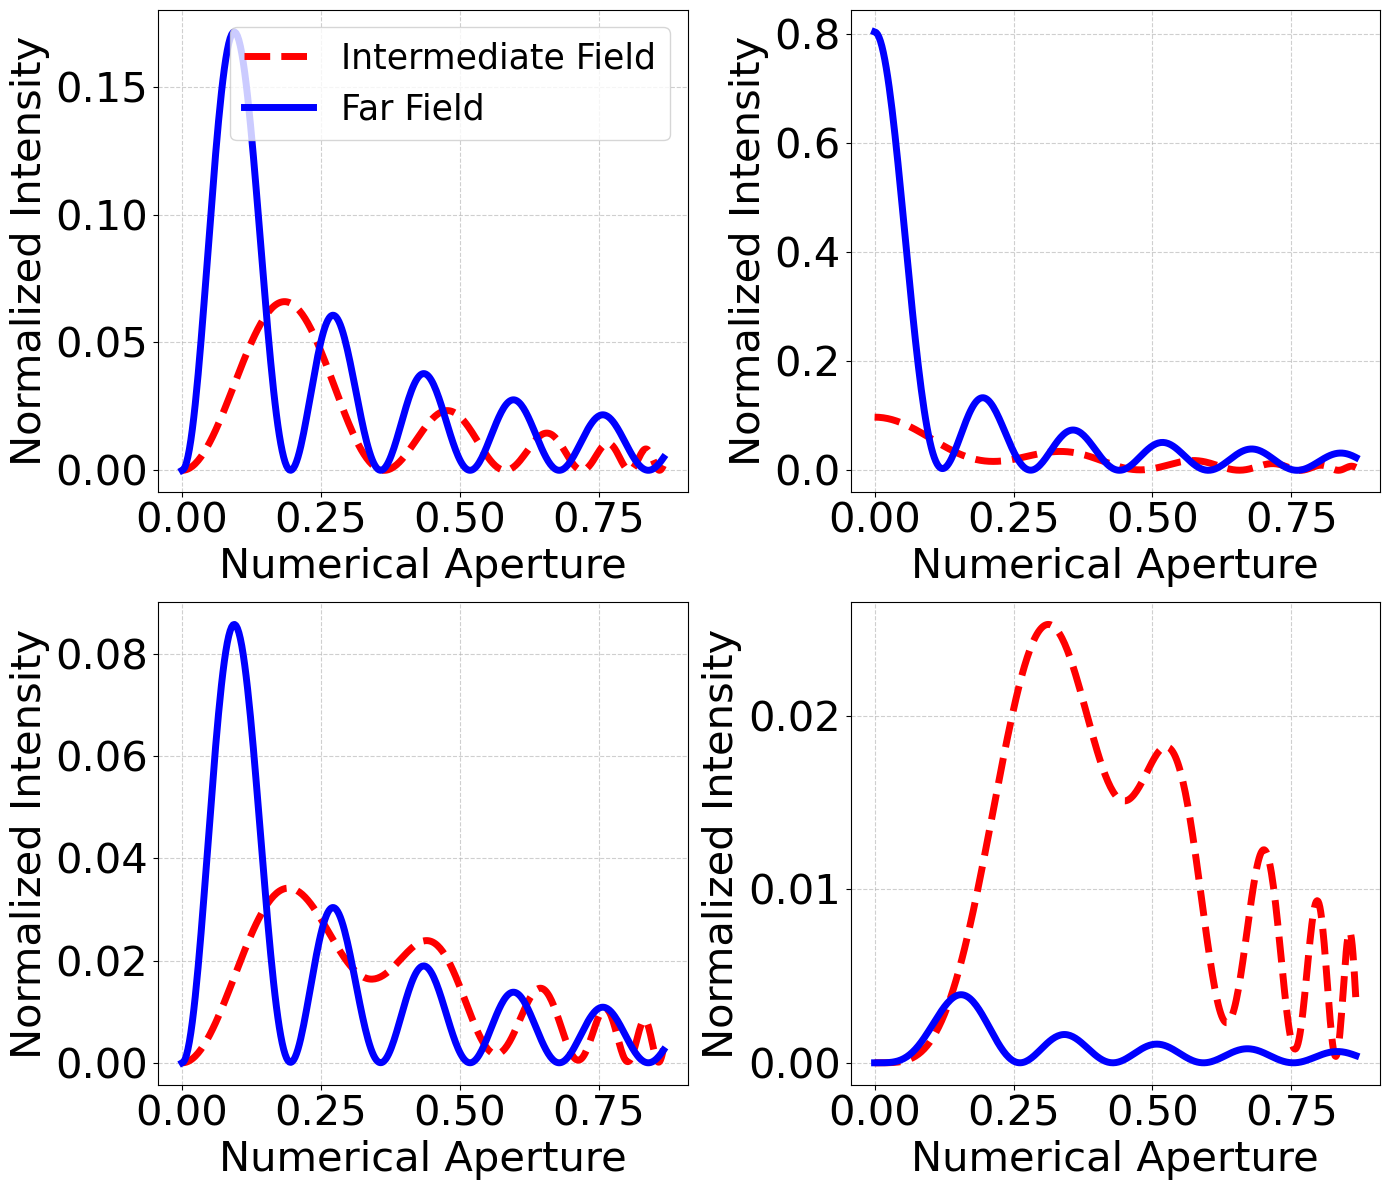

(0.2140782250164525+0.053623803827516296j)
(-34.18076615439351+46.08742422001735j)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv  # Bessel function of first kind
import math
 
# Define parameters
wavelength = 640e-9  # meters
k = 2 * np.pi / wavelength  # Wavevector
rho_n = 1e-6  # meters
rho_q = 2e-6  # meters
z = 20e-6  # meters
z0 = z + 50e-6  # z0 = z + 5 um
theta_q = math.atan(rho_q / z)
 
# Compute propagation distances
r_q = np.sqrt(z**2 + (rho_q)**2)  
 
# Numerical Aperture (NA) from theta
theta_vals = np.linspace(0, np.pi/3, 400)
phi_vals = np.linspace(0, 2*np.pi, 400)
NA_vals = np.sin(theta_vals)
 
# Define Constants for A and B
omega = 2 * np.pi * 3e8 / wavelength  # Angular frequency
epsilon_0 = 8.85e-12  # Permittivity of free space
c = 3e8  # Speed of light
alpha1 = 1e-28  # Placeholder for dipole response coefficient
alpha2 = 3e-29  # Placeholder for far-field coefficient
N=10
Q=10
 
# Define A(ρ, z) from Equation (10)
def A_func(rho, z):
    return N*(-1j * omega * alpha1 / (4 * np.pi * epsilon_0 * c)) * (np.exp(1j * k * z * (1 + (rho**2 / (2 * z**2))))) / (z**2)
 
# Define B(r, θ) from Equation (13)
def B_func(r, theta):
    return (alpha2 * omega**2 / (4 * np.pi * epsilon_0 * c**2)) * Q* A_func(rho_n, z) * (np.exp(1j * k * (r - r_q * np.cos(theta) * np.cos(theta_q)))) / r
 
# Function to compute normalized Intermediate Field Intensity
def intensity_IF(theta, phi, L):
    """Intermediate Field Intensity from Equation (10)"""
    A = A_func(rho_n, z)  # Compute A(ρ, z)
    J_Lm1 = jv(L-1, k * rho_n * np.tan(theta))
    J_Lp1 = jv(L+1, k * rho_n * np.tan(theta))
 
    E_x = A * (J_Lm1 * np.exp(1j * (L-1) * phi) + J_Lp1 * np.exp(1j * (L+1) * phi))
    E_y = A * (1j * J_Lm1 * np.exp(1j * (L-1) * phi) - 1j * J_Lp1 * np.exp(1j * (L+1) * phi))
 
    return np.abs(E_x)**2 + np.abs(E_y)**2
 
# Function to compute normalized Far-Field Intensity
def intensity_FF(theta, phi, L):
    """Far-Field Intensity from Equation (13)"""
    r = z0  
    B = B_func(r, theta)  # Compute B(r, θ)
 
    J_Lm1 = jv(L-1, k * rho_n * np.tan(theta_q)) * jv(L-1, k * r_q * np.sin(theta) * np.sin(theta_q))
    J_Lp1 = jv(L+1, k * rho_n * np.tan(theta_q)) * jv(L+1, k * r_q * np.sin(theta) * np.sin(theta_q))
 
    E_x = B * (J_Lm1 * np.exp(1j * (L-1) * phi) + J_Lp1 * np.exp(1j * (L+1) * phi))
    E_y = B * (1j * J_Lm1 * np.exp(1j * (L-1) * phi) - 1j * J_Lp1 * np.exp(1j * (L+1) * phi))
 
    return np.abs(E_x)**2 + np.abs(E_y)**2
 
# Define L values
L_values = [0, 1, 2, 3]
 
# Create a 2×2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()
 
# Iterate over L values
for i, L in enumerate(L_values):
    intensity_1 = intensity_IF(theta_vals, phi_vals, L)
    intensity_2 = intensity_FF(theta_vals, phi_vals, L)
 
    # Normalize and Plot Intermediate Field (Red, Dashed)
    axes[i].plot(NA_vals, intensity_1  , linestyle='--', color='r', linewidth=5, label='Intermediate Field')
 
    # Normalize and Plot Far Field (Blue, Solid)
    axes[i].plot(NA_vals, intensity_2 , linestyle='-', color='b', linewidth=5, label='Far Field')
   
    # Formatting each subplot
    axes[i].set_xlabel('Numerical Aperture', fontsize=30)
    axes[i].set_ylabel('Normalized Intensity', fontsize=30)
    #es[i].set_title(f'L = {L}', fontsize=25)
    axes[i].tick_params(axis='both', labelsize=30)  # Increase font size of tick labels
    axes[i].grid(True, linestyle='--', alpha=0.6)
 
    # Add legend only for the first subplot (L=0)
    if i == 0:
        axes[i].legend(fontsize=25)
   
# Adjust layout for better spacing
plt.tight_layout()
plt.show()
print(A_func(rho_n, z))
print(B_func(rho_n, z))
 
 
